# Reconhecimento de imagens baseado em histograma

## Package imports

In [1]:
import os
from skimage import io
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import math
from operator import itemgetter

## Hyper parâmetros e constantes

In [2]:
path = "dataset/Vistex"

## Entrada

In [3]:
input_img = "c001_001"
n_imgs = 3

## Distance functions

In [4]:
def euclidean_distance(x,y):
    assert x.shape[0] == y.shape[0], "wrong shape, exiting"
    return np.sum(np.sqrt(np.power((np.subtract(x,y)), 2)))

In [36]:
def qui_square_distance(x,y):
    alpha = 0.0000001
    assert x.shape[0] == y.shape[0], "wrong shape, exiting"
    num = np.power(np.subtract(x,y), 2)
    den = np.add(x,i) + alpha
    return 0.5*np.sum((np.divide(num, den)))

In [35]:
a = np.array([1,1,1,1])
b = np.array([2,2,2,2]) + 0.1

print(b)

np.divide(a,b)

[2.1 2.1 2.1 2.1]


NameError: name 'e' is not defined

## PDF, histogram and misc functions

In [7]:
def to_gray(img):
    w, h, nc = img.shape
    res = np.zeros((w,h), dtype=np.uint8 )

    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]

    res = np.divide(np.sum([r,g,b], dtype=np.uint16, axis=0), 3)
    res = res.astype(np.uint8)
    
    return res

In [8]:
def img_to_gray(imgs):
    if len(imgs)>1:
        res = list()
        for img in imgs:
            res.append( to_gray(img) )
    else:
        res = to_gray(imgs)
    return res
        

In [9]:
def gray_hist(src_img):
    w, h = src_img.shape
    res = np.zeros(256, dtype=np.uint8)
    
    for x in range(w):
        for y in range(h):
            res[src_img[x,y]] += 1
    return res

In [10]:
def gray_pdf(src_hist):
    #TODO receber as dimensões da respectiva imagem para cálculo. Uma imagem com dimensões fora do padrão pode causar falha.
    #w, h = src_hist.shape
    return src_hist / 16384

In [26]:
def dist_gray_pdf(src_pdf, comp_pdfs, dist_function):
    ddict = dict()
    for i, comp in enumerate(comp_pdfs):
        ddict[i] = dist_function(src_pdf, comp)
    return sorted(ddict.items(), key=itemgetter(1))[:n_imgs]

## Load images

In [12]:
def sorted_imgs(dir):
    return sorted(os.listdir(dir), key=lambda x: x.split('.')[0])

In [13]:
def prep_img_class_names(img_name):
    el = img_name.split('/')[2].split('_')
    c = el[0]
    idx = el[1].split('.')[0]
    return (c, idx)

In [14]:
img_names = [os.path.join(path, x) for x in sorted_imgs(path) ]

if 'dataset/Vistex/.gitignore' in img_names:
    img_names.remove('dataset/Vistex/.gitignore')

imgs = io.ImageCollection(img_names)

In [15]:
len(imgs)

864

In [16]:
imgs[0].shape

(128, 128, 3)

In [17]:
gray_imgs = img_to_gray(imgs)
len(gray_imgs)

864

In [18]:
lookup_table = list(map(prep_img_class_names, img_names))

lookup_table

[('c001', '001'),
 ('c001', '002'),
 ('c001', '003'),
 ('c001', '004'),
 ('c001', '005'),
 ('c001', '006'),
 ('c001', '007'),
 ('c001', '008'),
 ('c001', '009'),
 ('c001', '010'),
 ('c001', '011'),
 ('c001', '012'),
 ('c001', '013'),
 ('c001', '014'),
 ('c001', '015'),
 ('c001', '016'),
 ('c002', '001'),
 ('c002', '002'),
 ('c002', '003'),
 ('c002', '004'),
 ('c002', '005'),
 ('c002', '006'),
 ('c002', '007'),
 ('c002', '008'),
 ('c002', '009'),
 ('c002', '010'),
 ('c002', '011'),
 ('c002', '012'),
 ('c002', '013'),
 ('c002', '014'),
 ('c002', '015'),
 ('c002', '016'),
 ('c003', '001'),
 ('c003', '002'),
 ('c003', '003'),
 ('c003', '004'),
 ('c003', '005'),
 ('c003', '006'),
 ('c003', '007'),
 ('c003', '008'),
 ('c003', '009'),
 ('c003', '010'),
 ('c003', '011'),
 ('c003', '012'),
 ('c003', '013'),
 ('c003', '014'),
 ('c003', '015'),
 ('c003', '016'),
 ('c004', '001'),
 ('c004', '002'),
 ('c004', '003'),
 ('c004', '004'),
 ('c004', '005'),
 ('c004', '006'),
 ('c004', '007'),
 ('c004', 

## Show histogram graphs

### Gray level

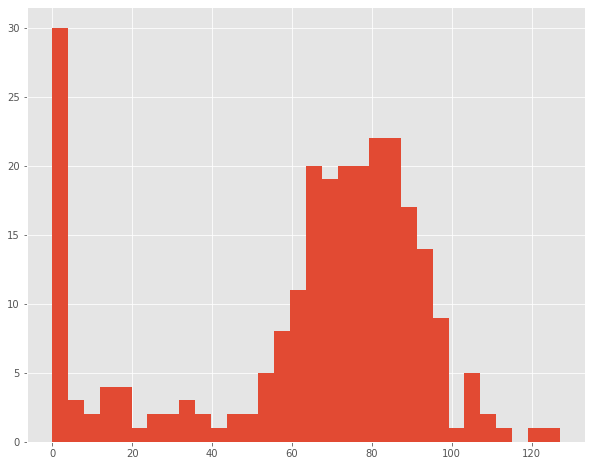

In [19]:
ret = gray_hist(gray_imgs[0])

plt.figure(figsize=[10,8])
plt.style.use('ggplot')

plt.hist(ret, bins=32)
plt.show()

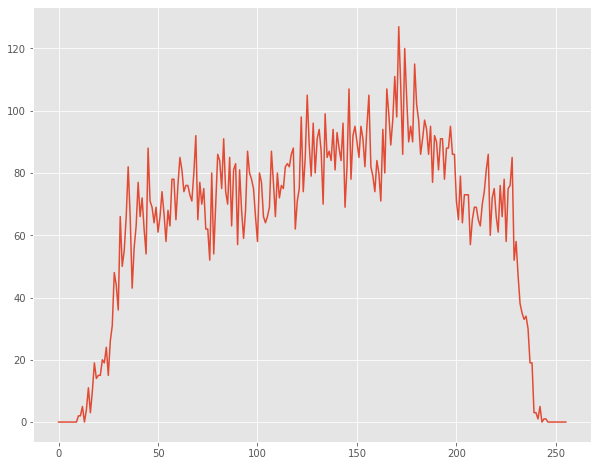

In [20]:
plt.figure(figsize=[10,8])
plt.plot(ret)
plt.show()

In [21]:
gray_hists = [gray_hist(x) for x in gray_imgs]

In [22]:
gray_pdfs = [gray_pdf(x) for x in gray_hists]

### First 9 images histogram

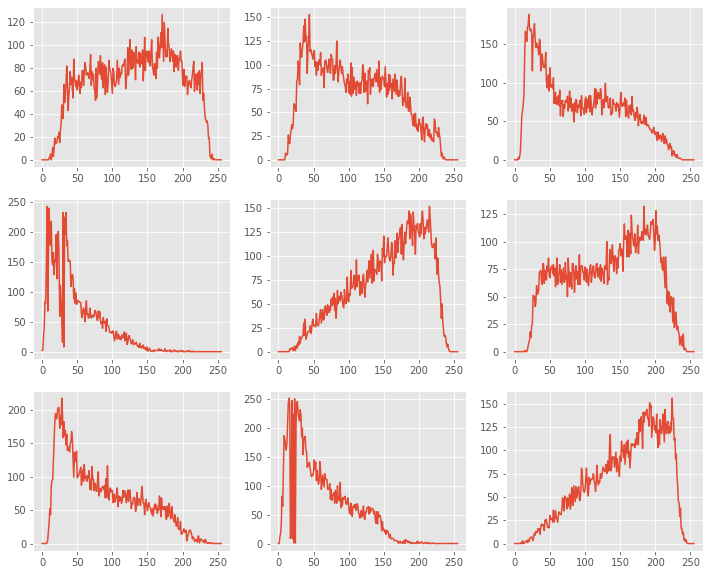

In [23]:
f, ax = plt.subplots(3,3, figsize=[12,10])

for i in range(3):
    for j in range(3):
        ret = gray_hists[i*3+j]
        
        ax[i,j].plot(ret)
plt.show()

### First 9 images PDF

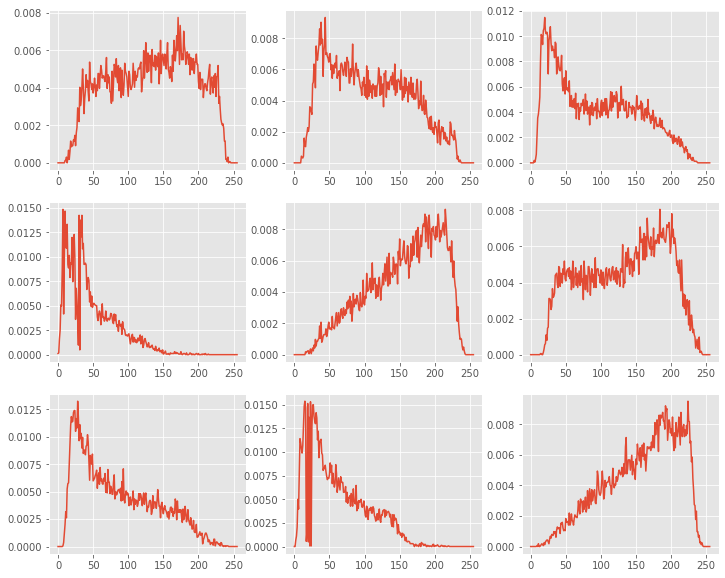

In [24]:
f, ax = plt.subplots(3,3, figsize=[12,10])

for i in range(3):
    for j in range(3):
        ret = gray_pdfs[i*3+j]
        
        ax[i,j].plot(ret)
plt.show()

## Recognition evaluation

### Gray level euclidean distance

In [28]:
results = dist_gray_pdf(gray_pdfs[0], gray_pdfs, euclidean_distance)

acc = 0

for i, x in enumerate(gray_pdfs):
    res = dist_gray_pdf(x, gray_pdfs, euclidean_distance)
    c = dict()
    
    
    

    for r in res:
        cl = lookup_table[r[0]][0]
        if cl not in c.keys():
            c[cl] = 0
        c[cl] += 1

    r = sorted(c.items(), key=itemgetter(1))
    #print(r)
    #print('')
    #print(lookup_table[i][0])
    #print(r[0][0])
    
    if r[0][0] == lookup_table[i][0]:
        acc += 1

print('')
print(f'TP: {acc} samples')
print(f'Acc: {acc / len(gray_pdfs)}%')


TP: 708 samples
Acc: 0.8194444444444444%


### Gray level $\chi^2$ distance


In [37]:
results = dist_gray_pdf(gray_pdfs[0], gray_pdfs, qui_square_distance)

acc = 0

for i, x in enumerate(gray_pdfs):
    res = dist_gray_pdf(x, gray_pdfs, qui_square_distance)
    c = dict()
    
    
    

    for r in res:
        cl = lookup_table[r[0]][0]
        if cl not in c.keys():
            c[cl] = 0
        c[cl] += 1

    r = sorted(c.items(), key=itemgetter(1))
    #print(r)
    #print('')
    #print(lookup_table[i][0])
    #print(r[0][0])
    
    if r[0][0] == lookup_table[i][0]:
        acc += 1

print('')
print(f'TP: {acc}')
print(f'Acc: {acc / len(gray_pdfs)}%')


TP: 653
Acc: 0.7557870370370371%
